In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
columns = ['fLength','fWidth', 'fSize', 'fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist', 'class']

In [3]:
df = pd.read_csv('Data/magic04.csv', names=columns)

In [4]:
df['class'] = (df['class'] == 'g').astype(int)
df['class'].unique()

array([1, 0])

In [5]:
train, validation, testing =np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [6]:
scaler = StandardScaler()

In [7]:
def scale_dataset(dataframe, oversampler=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    if oversampler == True:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
        
    x = scaler.fit_transform(x)
    data = np.hstack((x, np.reshape(y,(-1,1))))
    return data, x, y

In [8]:
train, x_train, y_train = scale_dataset(train, oversampler=True)
validation, x_valid, y_valid = scale_dataset(validation, oversampler=False)
testing, x_testing, y_testing = scale_dataset(testing, oversampler=False)

NEURAL NETWORK

In [9]:
def plot_loss_and_accurcy(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('binary crossentropy')
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.legend()
    ax2.grid(True)
    plt.show() 

In [10]:
def train_neural_model(x_train, y_train, num_nodes, dropout_probability, learning_rate, batch_size, epochs):
    neural_network = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_probability),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_probability),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    neural_network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = neural_network.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return neural_network, history

16 nodes, dropout 0, learning rate 0.1, batch size 32


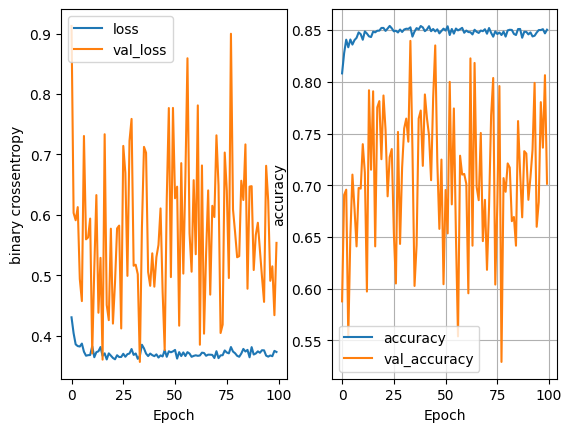

119/119 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8423
16 nodes, dropout 0, learning rate 0.1, batch size 64


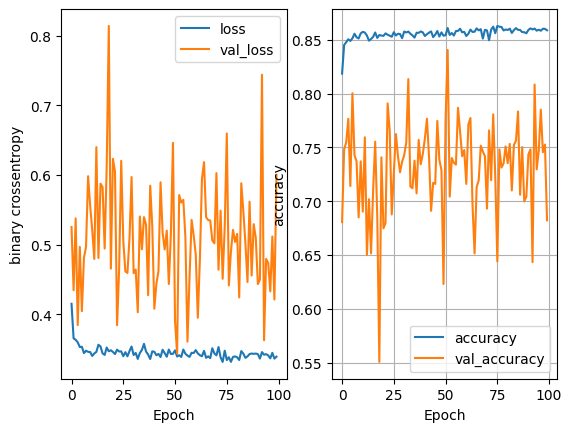

119/119 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8665
16 nodes, dropout 0, learning rate 0.1, batch size 128


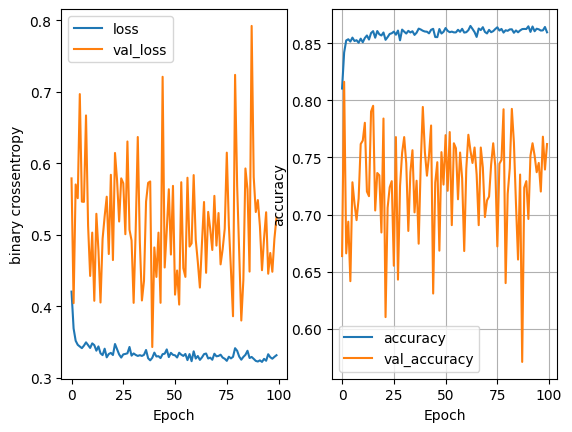

119/119 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8515
16 nodes, dropout 0, learning rate 0.005, batch size 32


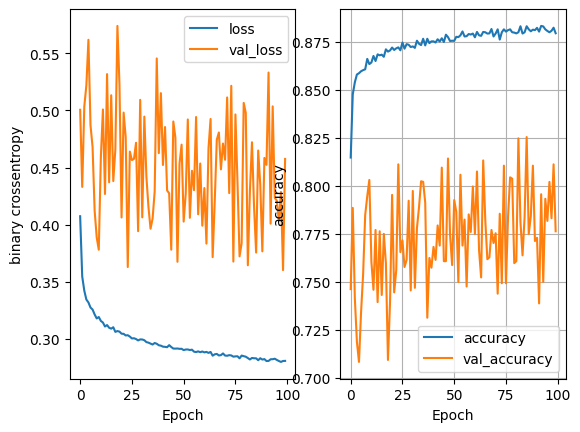

119/119 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8570
16 nodes, dropout 0, learning rate 0.005, batch size 64


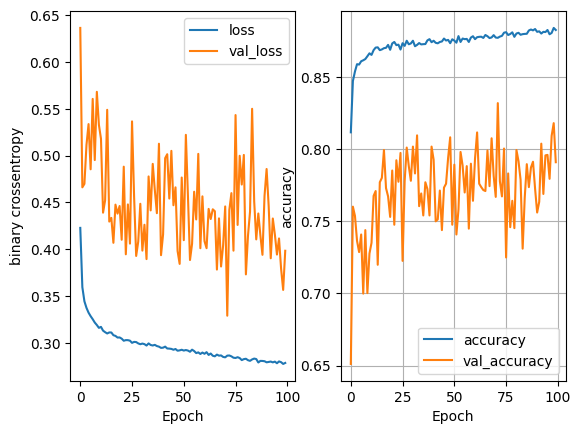

119/119 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8583
16 nodes, dropout 0, learning rate 0.005, batch size 128


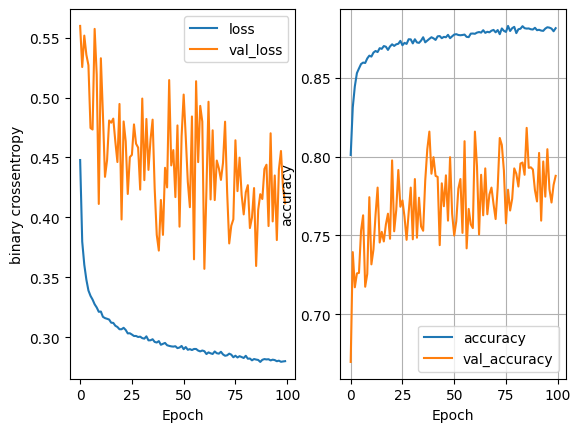

119/119 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8686
16 nodes, dropout 0, learning rate 0.001, batch size 32


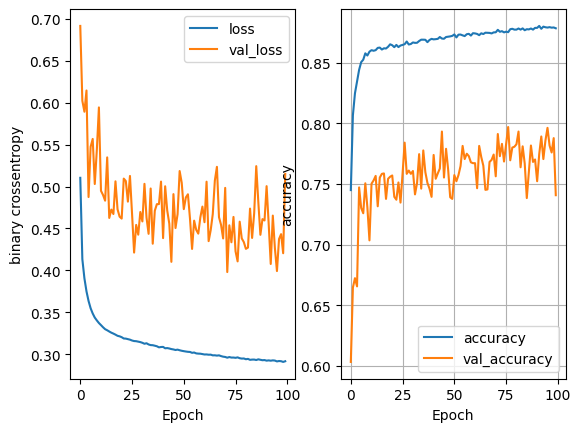

119/119 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8628
16 nodes, dropout 0, learning rate 0.001, batch size 64


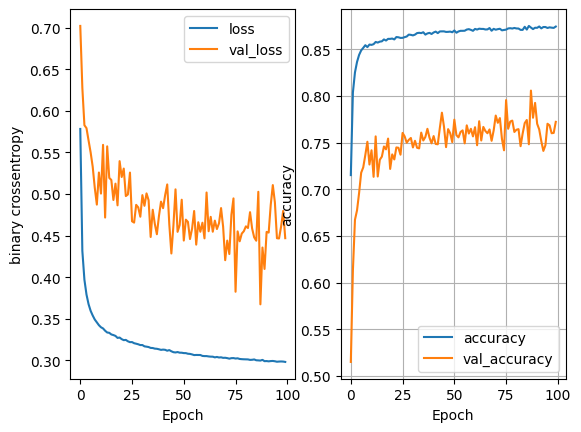

119/119 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8557
16 nodes, dropout 0, learning rate 0.001, batch size 128


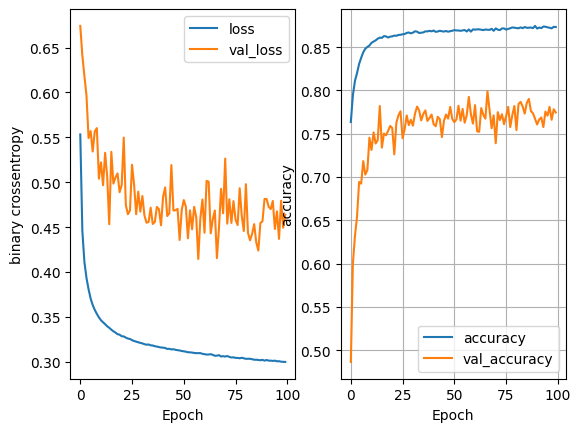

119/119 [==============================] - 0s 965us/step - loss: 0.3378 - accuracy: 0.8607
16 nodes, dropout 0.2, learning rate 0.1, batch size 32


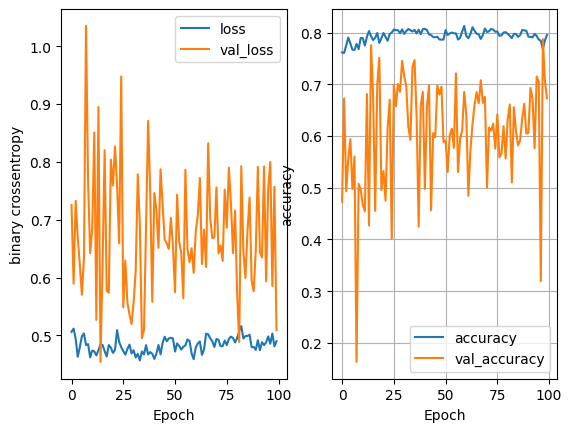

119/119 [==============================] - 0s 965us/step - loss: 0.4923 - accuracy: 0.8294
16 nodes, dropout 0.2, learning rate 0.1, batch size 64


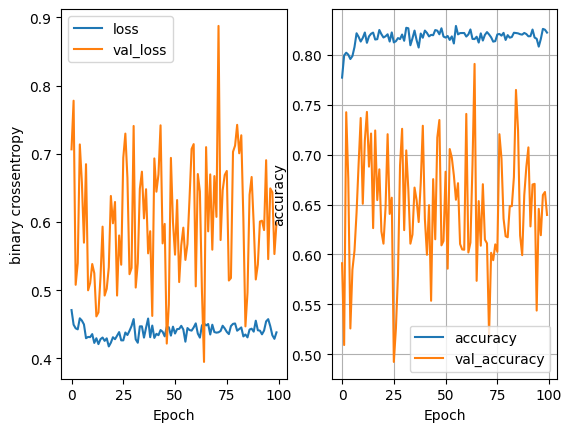

119/119 [==============================] - 0s 891us/step - loss: 0.4220 - accuracy: 0.8512
16 nodes, dropout 0.2, learning rate 0.1, batch size 128


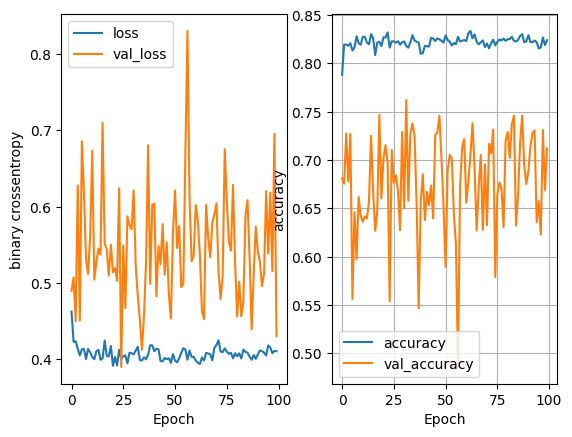

119/119 [==============================] - 0s 949us/step - loss: 0.4450 - accuracy: 0.8512
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


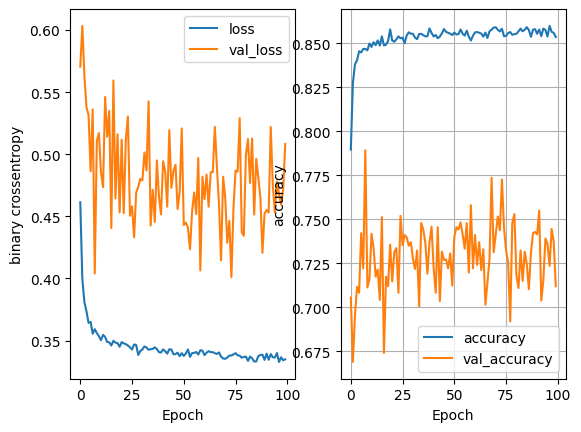

119/119 [==============================] - 0s 974us/step - loss: 0.3222 - accuracy: 0.8725
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


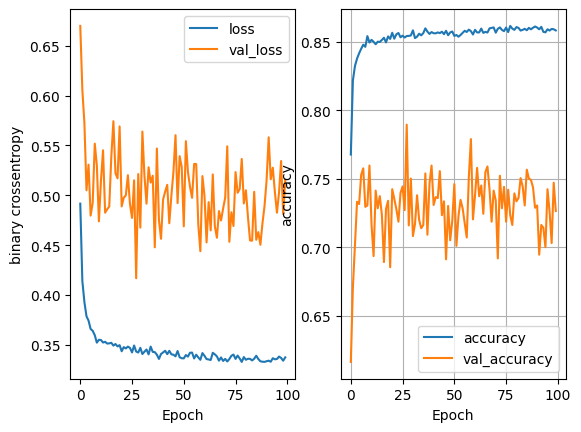

119/119 [==============================] - 0s 914us/step - loss: 0.3237 - accuracy: 0.8654
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


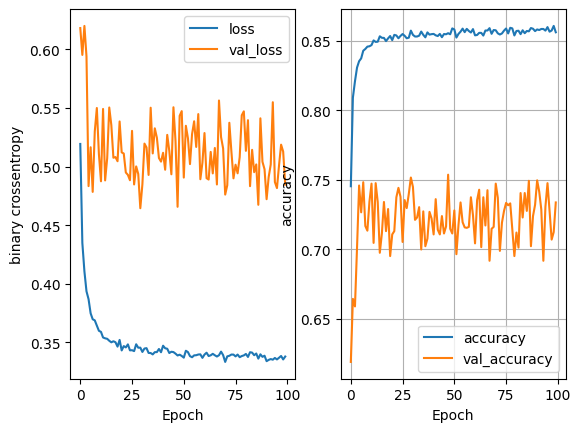

119/119 [==============================] - 0s 964us/step - loss: 0.3380 - accuracy: 0.8625
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


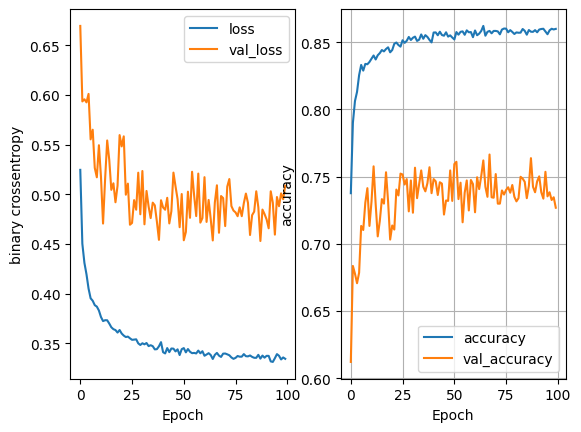

119/119 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8604
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


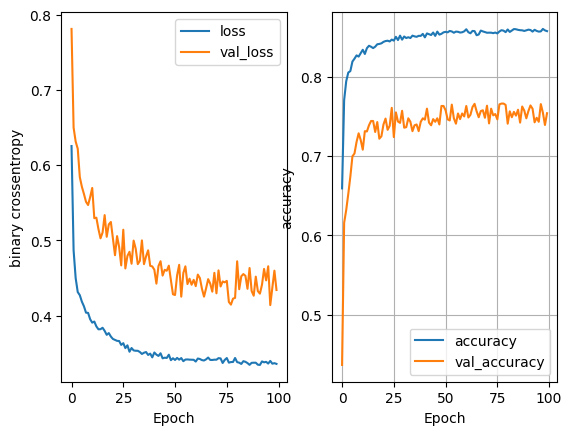

119/119 [==============================] - 0s 925us/step - loss: 0.3432 - accuracy: 0.8623
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


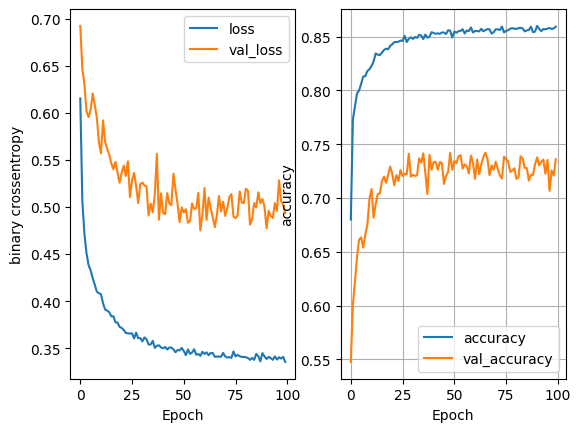

119/119 [==============================] - 0s 872us/step - loss: 0.3316 - accuracy: 0.8604
32 nodes, dropout 0, learning rate 0.1, batch size 32


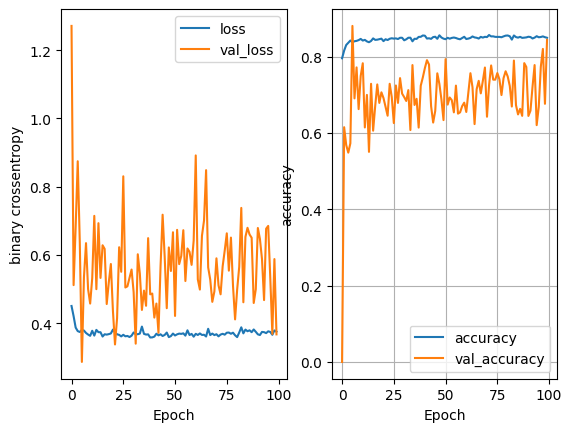

119/119 [==============================] - 0s 842us/step - loss: 0.4811 - accuracy: 0.7847
32 nodes, dropout 0, learning rate 0.1, batch size 64


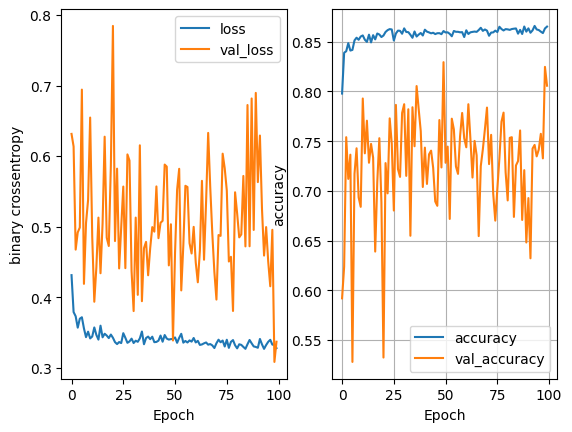

119/119 [==============================] - 0s 845us/step - loss: 0.4678 - accuracy: 0.8410
32 nodes, dropout 0, learning rate 0.1, batch size 128


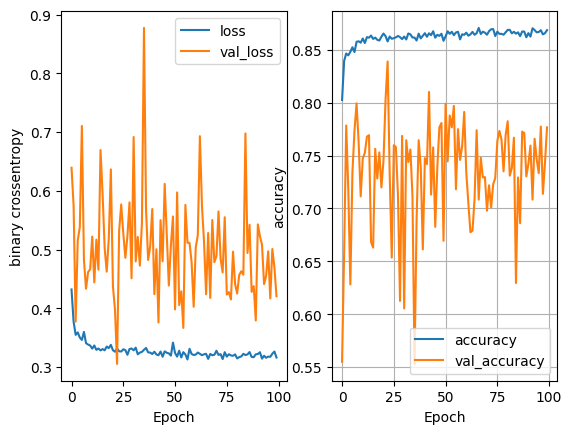

119/119 [==============================] - 0s 834us/step - loss: 0.3805 - accuracy: 0.8512
32 nodes, dropout 0, learning rate 0.005, batch size 32


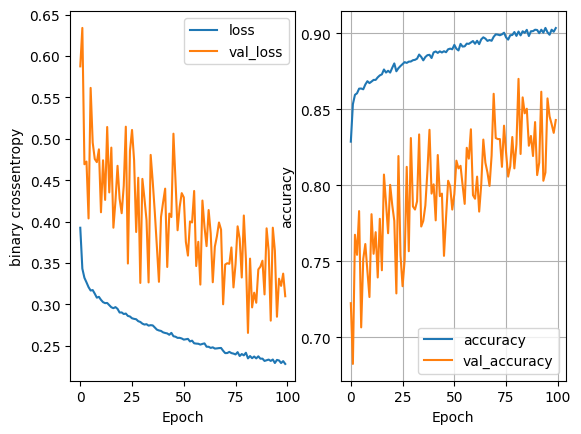

119/119 [==============================] - 0s 856us/step - loss: 0.4421 - accuracy: 0.8394
32 nodes, dropout 0, learning rate 0.005, batch size 64


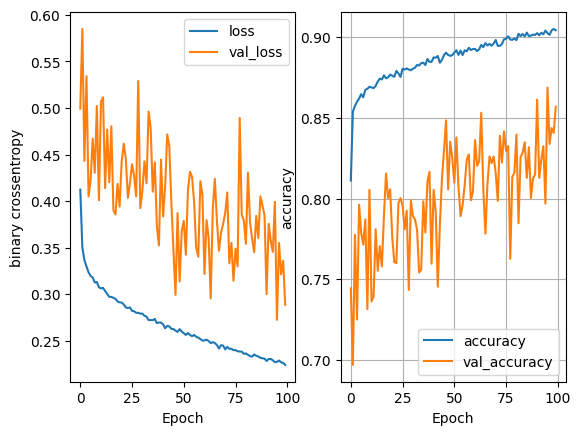

119/119 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8349
32 nodes, dropout 0, learning rate 0.005, batch size 128


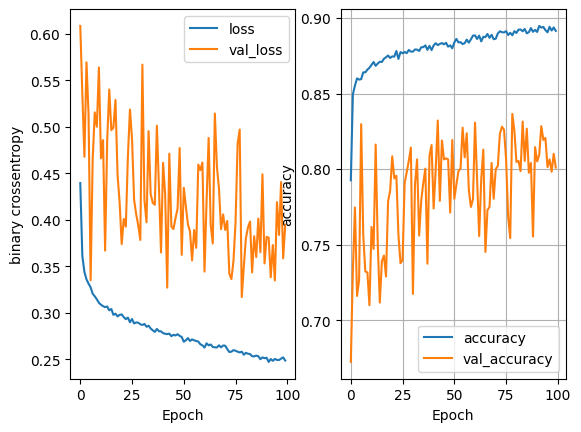

119/119 [==============================] - 0s 842us/step - loss: 0.3766 - accuracy: 0.8502
32 nodes, dropout 0, learning rate 0.001, batch size 32


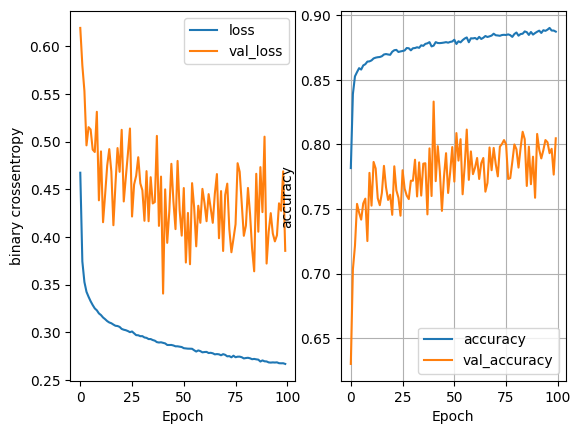

119/119 [==============================] - 0s 839us/step - loss: 0.3585 - accuracy: 0.8470
32 nodes, dropout 0, learning rate 0.001, batch size 64


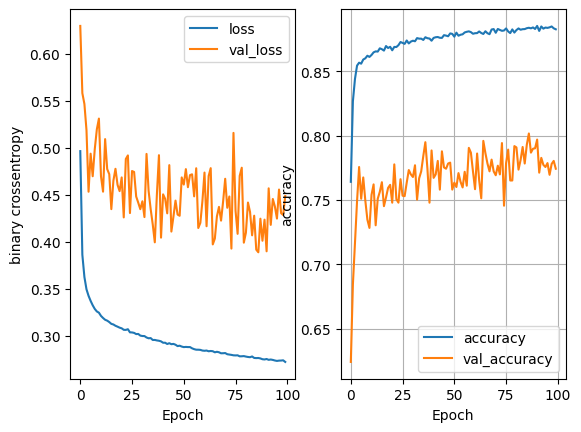

119/119 [==============================] - 0s 828us/step - loss: 0.3358 - accuracy: 0.8625
32 nodes, dropout 0, learning rate 0.001, batch size 128


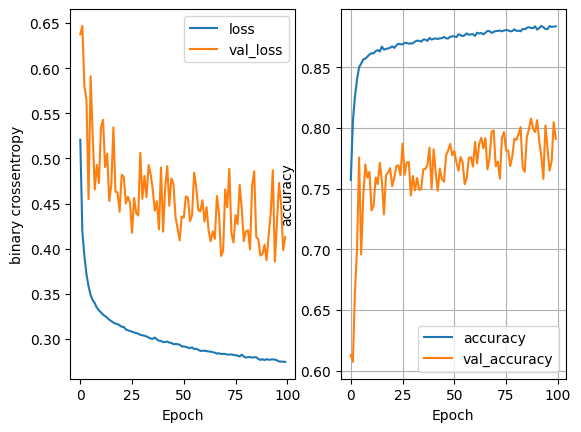

119/119 [==============================] - 0s 832us/step - loss: 0.3503 - accuracy: 0.8517
32 nodes, dropout 0.2, learning rate 0.1, batch size 32


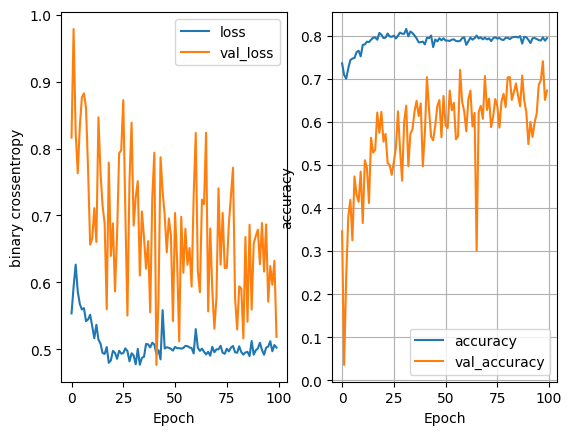

119/119 [==============================] - 0s 837us/step - loss: 0.4636 - accuracy: 0.8360
32 nodes, dropout 0.2, learning rate 0.1, batch size 64


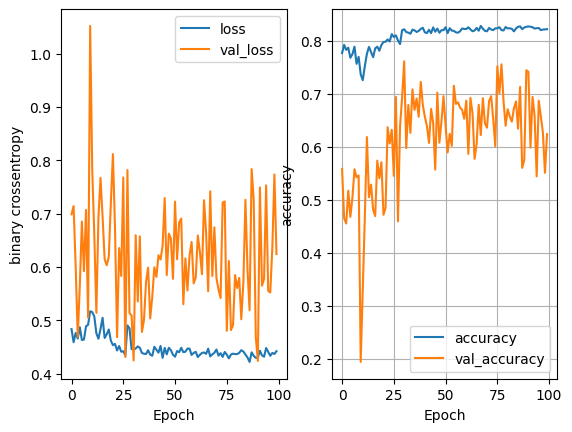

119/119 [==============================] - 0s 852us/step - loss: 0.3937 - accuracy: 0.8562
32 nodes, dropout 0.2, learning rate 0.1, batch size 128


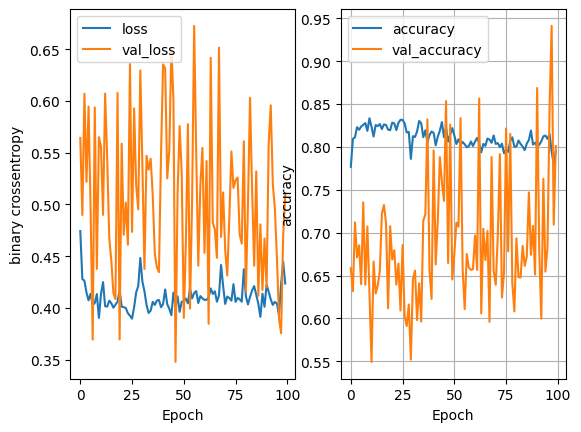

119/119 [==============================] - 0s 831us/step - loss: 0.3763 - accuracy: 0.8036
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


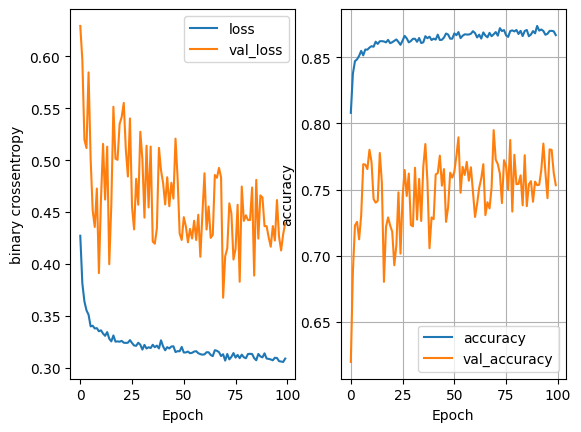

119/119 [==============================] - 0s 870us/step - loss: 0.3303 - accuracy: 0.8693
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


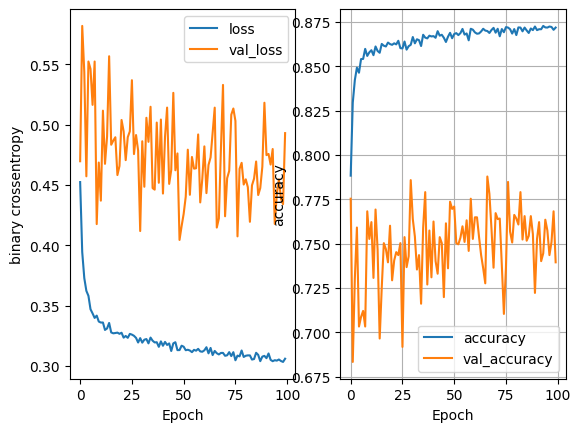

119/119 [==============================] - 0s 851us/step - loss: 0.3157 - accuracy: 0.8686
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


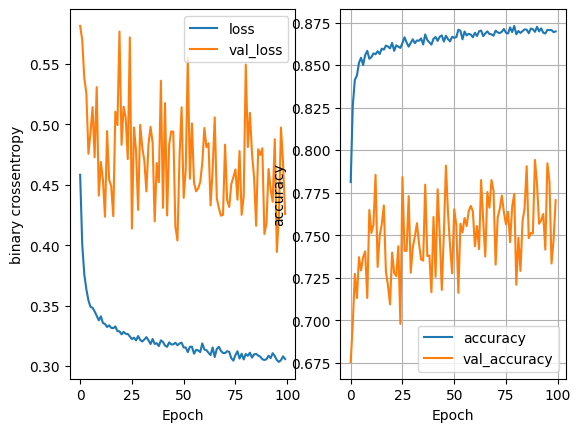

119/119 [==============================] - 0s 819us/step - loss: 0.3250 - accuracy: 0.8646
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


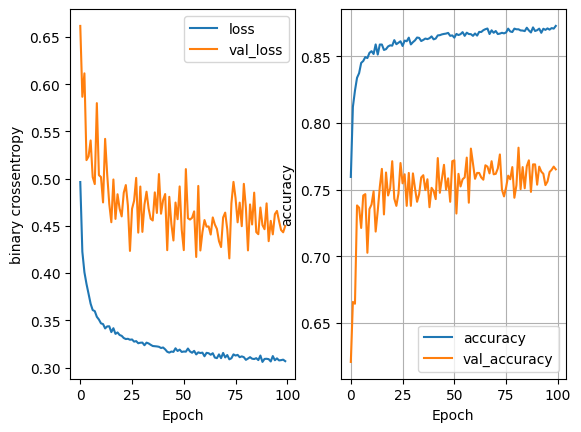

119/119 [==============================] - 0s 988us/step - loss: 0.3194 - accuracy: 0.8696
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


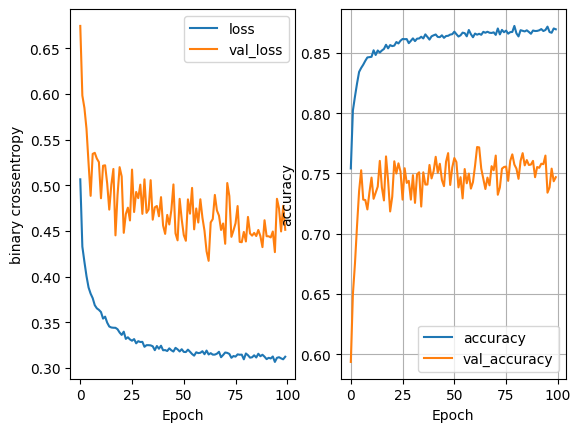

119/119 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8670
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


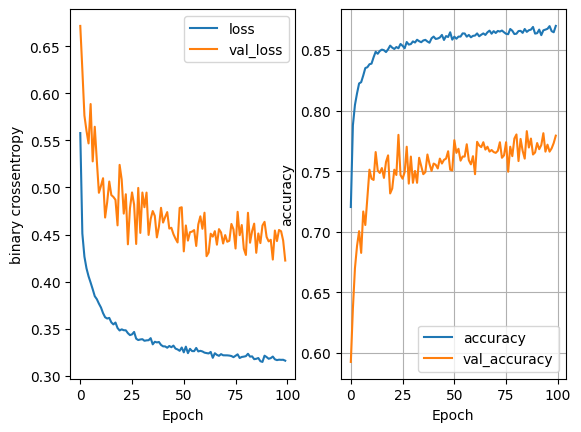

119/119 [==============================] - 0s 929us/step - loss: 0.3392 - accuracy: 0.8573
64 nodes, dropout 0, learning rate 0.1, batch size 32


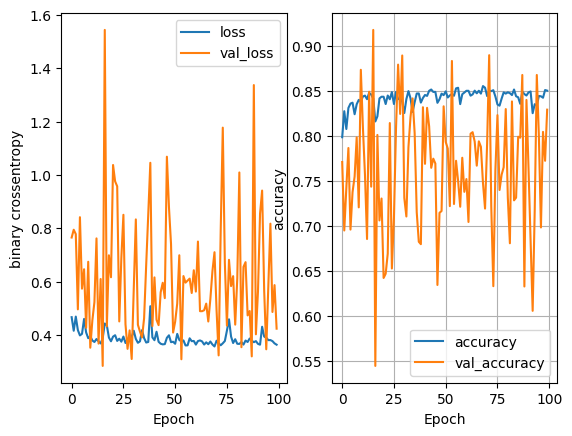

119/119 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8233
64 nodes, dropout 0, learning rate 0.1, batch size 64


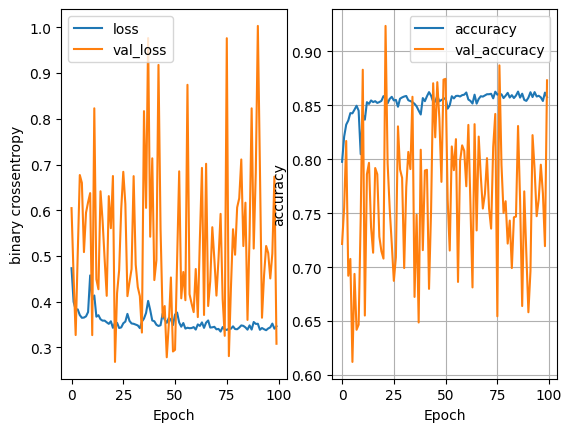

119/119 [==============================] - 0s 938us/step - loss: 0.4473 - accuracy: 0.7894
64 nodes, dropout 0, learning rate 0.1, batch size 128


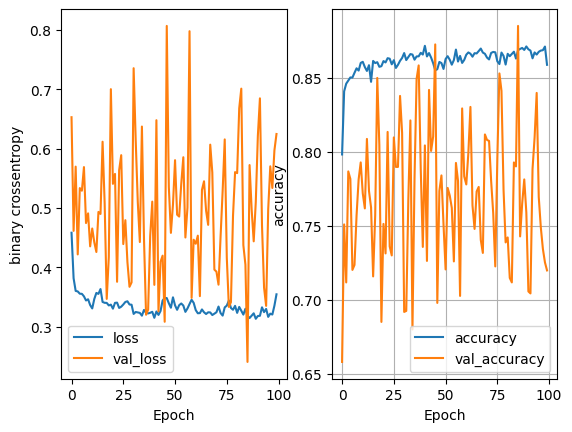

119/119 [==============================] - 0s 980us/step - loss: 0.3569 - accuracy: 0.8546
64 nodes, dropout 0, learning rate 0.005, batch size 32


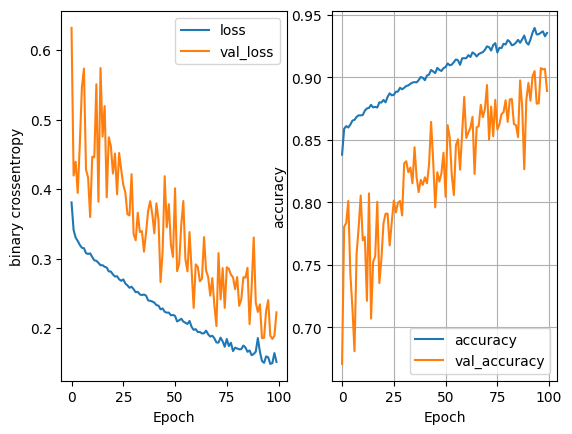

119/119 [==============================] - 0s 907us/step - loss: 0.6942 - accuracy: 0.8333
64 nodes, dropout 0, learning rate 0.005, batch size 64


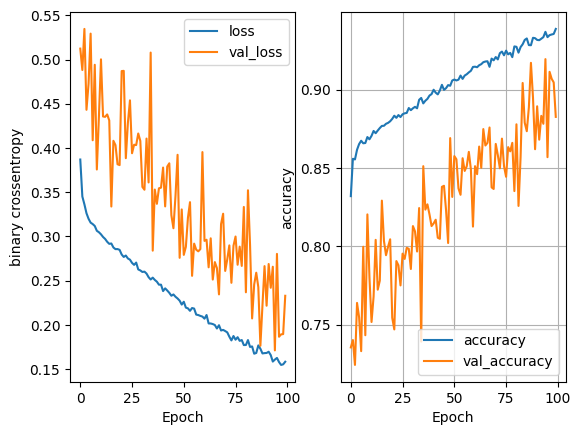

119/119 [==============================] - 0s 943us/step - loss: 0.6872 - accuracy: 0.8265
64 nodes, dropout 0, learning rate 0.005, batch size 128


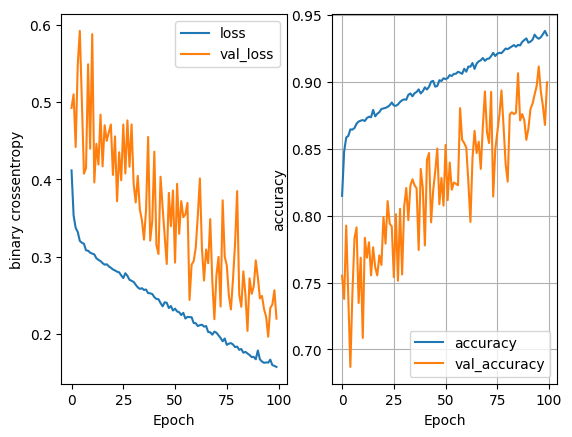

119/119 [==============================] - 0s 929us/step - loss: 0.5671 - accuracy: 0.8336
64 nodes, dropout 0, learning rate 0.001, batch size 32


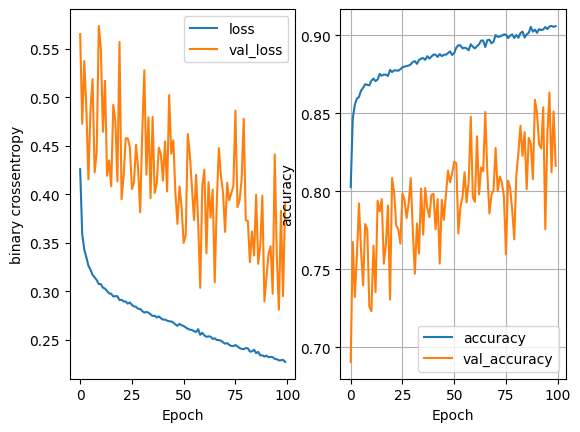

119/119 [==============================] - 0s 848us/step - loss: 0.3749 - accuracy: 0.8583
64 nodes, dropout 0, learning rate 0.001, batch size 64


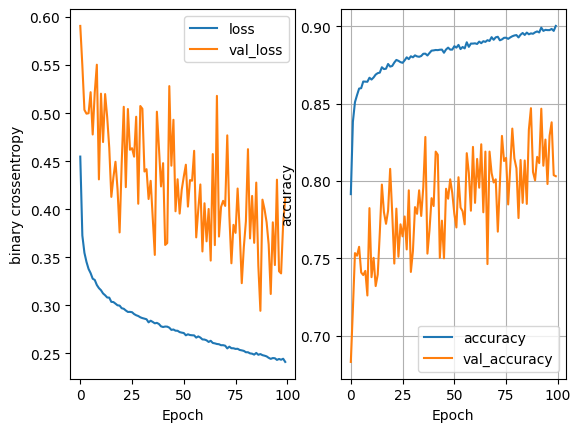

119/119 [==============================] - 0s 826us/step - loss: 0.3565 - accuracy: 0.8591
64 nodes, dropout 0, learning rate 0.001, batch size 128


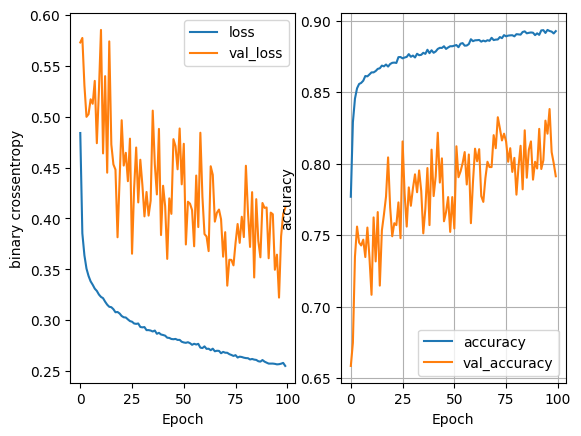

119/119 [==============================] - 0s 821us/step - loss: 0.3532 - accuracy: 0.8573
64 nodes, dropout 0.2, learning rate 0.1, batch size 32


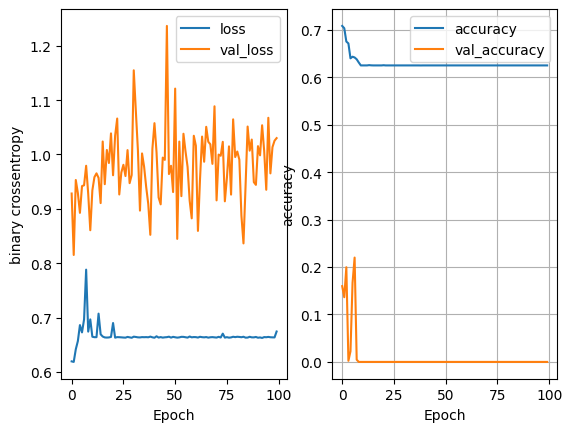

119/119 [==============================] - 0s 836us/step - loss: 0.6512 - accuracy: 0.6438
64 nodes, dropout 0.2, learning rate 0.1, batch size 64


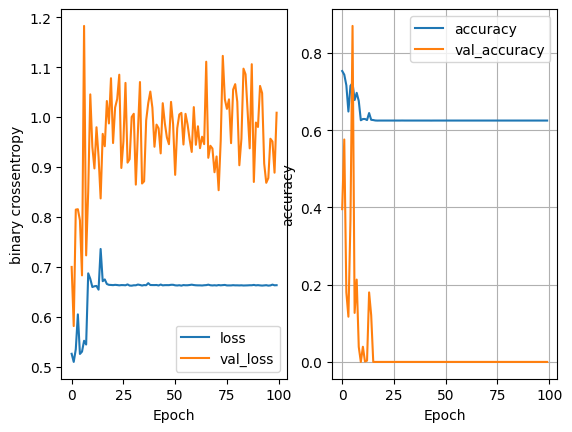

119/119 [==============================] - 0s 852us/step - loss: 0.6514 - accuracy: 0.6438
64 nodes, dropout 0.2, learning rate 0.1, batch size 128


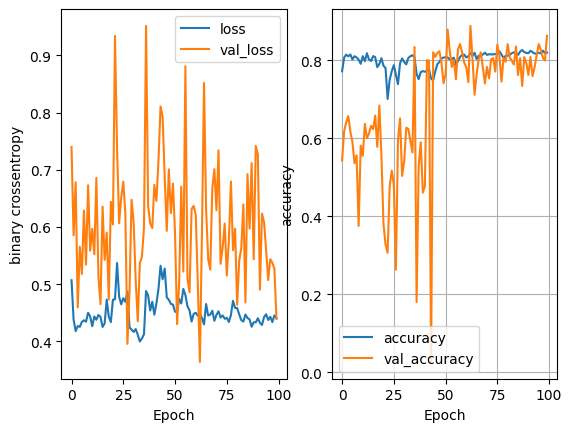

119/119 [==============================] - 0s 835us/step - loss: 0.4618 - accuracy: 0.7800
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


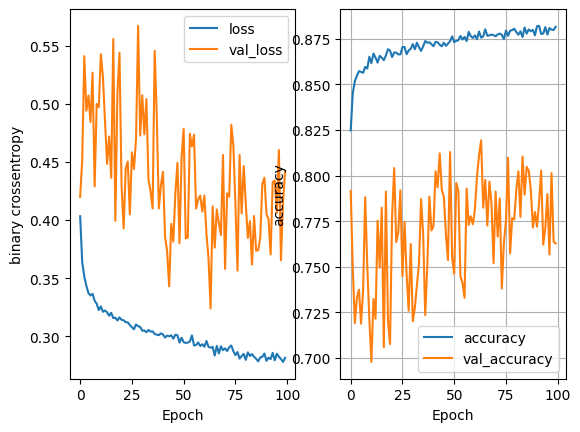

119/119 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8691
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


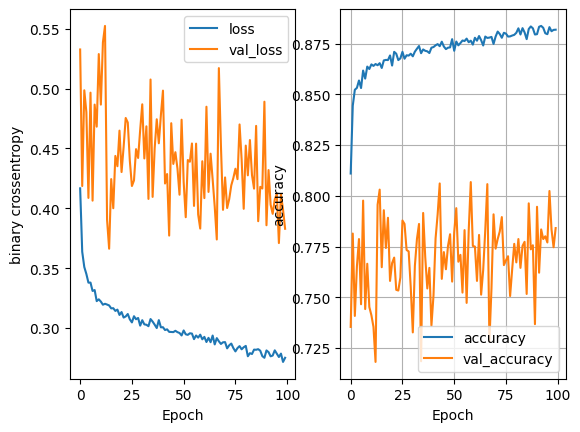

119/119 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8625
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


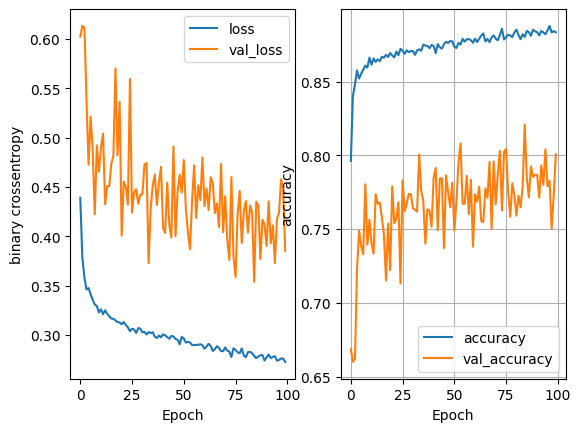

119/119 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8691
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


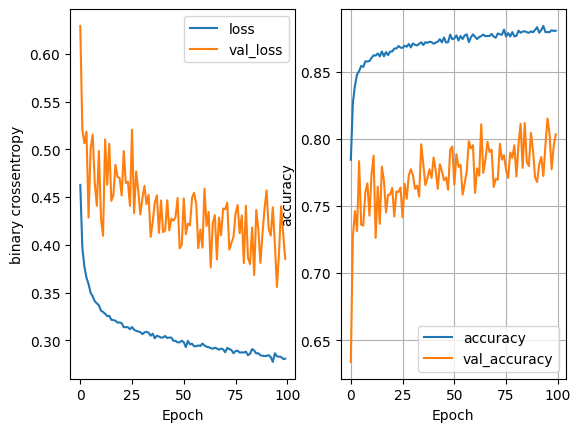

119/119 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8675
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


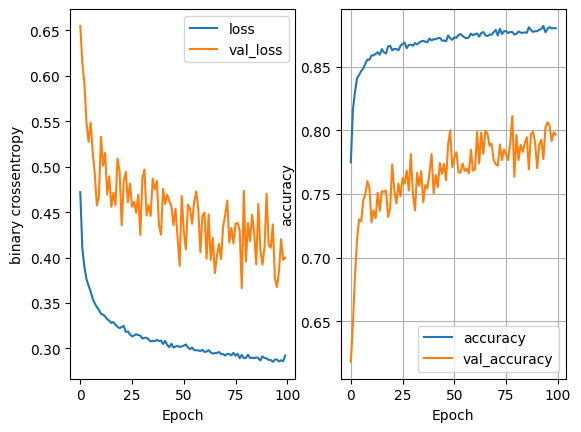

119/119 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8623
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


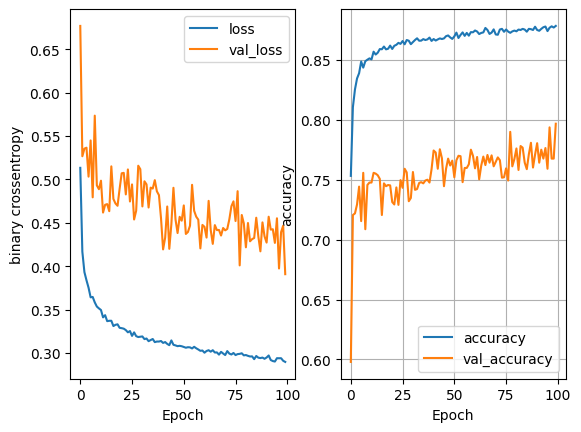

119/119 [==============================] - 0s 819us/step - loss: 0.3269 - accuracy: 0.8657


In [11]:
epochs = 100
least_value_loss = float('inf')
least_loss_model = None
for num_nodes in [16, 32, 64]:
    for dropout_probability in [0, 0.2]:
        for learning_rate in [0.1, 0.005, 0.001]:
            for batch_size in [ 32, 64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_probability}, learning rate {learning_rate}, batch size {batch_size}')
                model, history = train_neural_model(x_train, y_train, num_nodes, dropout_probability, learning_rate, batch_size, epochs)
                plot_loss_and_accurcy(history)
                value_loss = model.evaluate(x_valid, y_valid)[0]
                if value_loss < least_value_loss:
                    least_value_loss = value_loss
                    least_loss_model = model